In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm as LN
import pynbody as pb

In [80]:
def icinfo(file):
    sim = pb.load(file)
    print('Number of particles')
    print('Stars:',len(sim.s))
    print('Gas:',len(sim.g))
    print('Dark Matter:',len(sim.d))
    print('Total:',len(sim))
    print()
    print('Mass')
    print('Stars:',format(sum(sim.s['mass'].in_units('Msol')),'.2e'),'Msun')
    print('Gas:',format(sum(sim.g['mass'].in_units('Msol')),'.2e'),'Msun')
    print('Dark Matter:',format(sum(sim.d['mass'].in_units('Msol')),'.2e'),'Msun')
    print('Total:',format(sum(sim['mass'].in_units('Msol')),'.2e'),'Msun')
    
    try:
        pb.analysis.halo.center(sim,mode='hyb')
    except:
        sim['pos'] = sim['pos']-np.array([np.median(sim.s['x']),np.median(sim.s['y']),np.median(sim.s['z'])])
    pb.analysis.angmom.faceon(sim.s)
    
    prof=pb.analysis.profile.Profile(sim,bins=np.linspace(0,10,100))
    profd=pb.analysis.profile.Profile(sim.d,bins=np.linspace(0,10,100))
    profs=pb.analysis.profile.Profile(sim.s,bins=np.linspace(0,10,100))
    
    plt.figure(figsize=(14,3.5))
    plt.subplot(1,3,1)
    plt.plot(prof['rbins'],prof['v_circ'].in_units('km s**-1'),'k-')
    plt.xlabel('R (kpc)')
    plt.ylabel('Circular Velocity (km/s)')

    plt.subplot(1,3,2)
    plt.plot(prof['rbins'],prof['density'].in_units('Msol kpc**-2'),'k-')
    plt.plot(profs['rbins'],profs['density'].in_units('Msol kpc**-2'),'b-')
    plt.plot(profd['rbins'],profd['density'].in_units('Msol kpc**-2'),'r-')
    plt.yscale('log')
    plt.xlabel('R (kpc)')
    plt.ylabel('Density (Msun/kpc^2)')

    plt.subplot(1,3,3)
    plt.plot(prof['rbins'],prof['mass_enc']/sum(sim['mass']),'k-',label='Total')
    plt.plot(profs['rbins'],profs['mass_enc']/sum(sim.s['mass']),'b-',label='Stars')
    plt.plot(profd['rbins'],profd['mass_enc']/sum(sim.d['mass']),'r-',label='Dark Matter')
    plt.xlabel('R (kpc)')
    plt.ylabel('Fraction of mass enclosed')
    plt.legend()

LMC file for simulations run with GASOLINE
Number of particles
Stars: 186675
Gas: 18407
Dark Matter: 238000
Total: 443082

Mass
Stars: 5.25e+09 Msun
Gas: 1.94e+09 Msun
Dark Matter: 1.81e+11 Msun
Total: 1.88e+11 Msun


pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


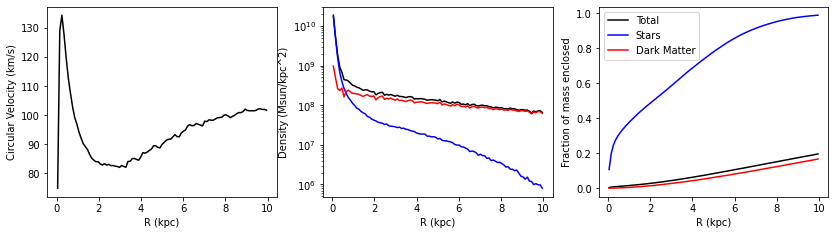

In [85]:
print('LMC file for simulations run with GASOLINE')
icinfo('../LMC_A_FB10_dPhys1.00600')

LMC file for simulations run with PKDGRAV
Number of particles
Stars: 162000
Gas: 0
Dark Matter: 238000
Total: 400000

Mass
Stars: 7.28e+09 Msun
Gas: 0.00e+00 Msun
Dark Matter: 1.76e+11 Msun
Total: 1.83e+11 Msun


pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


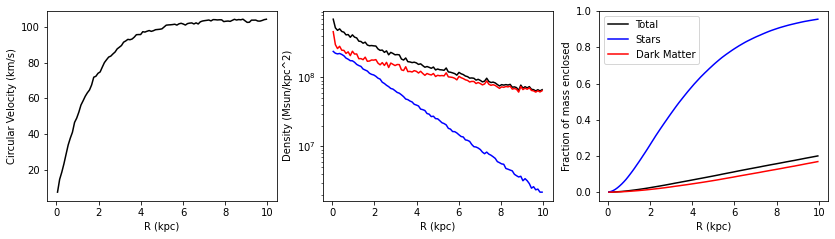

In [86]:
print('LMC file for simulations run with PKDGRAV')
icinfo('../LMC_A_Stars.00000')

pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


SMC file for simulations run with GASOLINE
Number of particles
Stars: 20836
Gas: 3998
Dark Matter: 29000
Total: 53834

Mass
Stars: 5.97e+08 Msun
Gas: 4.21e+08 Msun
Dark Matter: 2.19e+10 Msun
Total: 2.29e+10 Msun


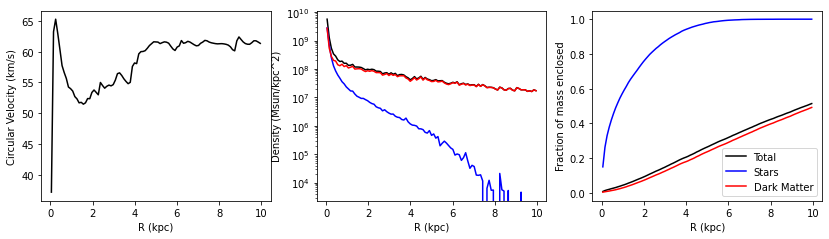

In [87]:
print('SMC file for simulations run with GASOLINE')
icinfo('../SMC_A_FB10_dPhys1.00600')

pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


SMC file for simulations run with PKDGRAV
Number of particles
Stars: 22500
Gas: 0
Dark Matter: 29000
Total: 51500

Mass
Stars: 1.06e+09 Msun
Gas: 0.00e+00 Msun
Dark Matter: 2.02e+10 Msun
Total: 2.12e+10 Msun


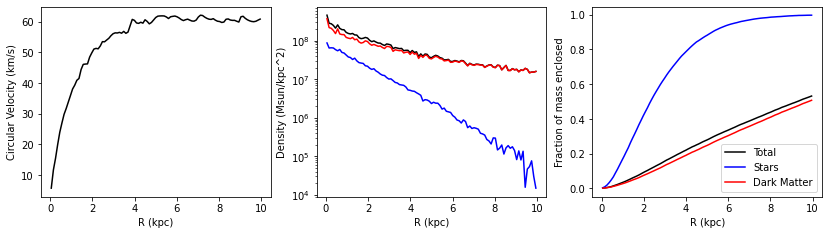

In [88]:
print('SMC file for simulations run with PKDGRAV')
icinfo('../SMC_A_Stars.00000')